<a href="https://colab.research.google.com/github/viancavarma/code/blob/main/ML_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the Machine Learning Made Easy workshop! 

In this workshop, you will work with me to design your very own machine learning algorithm which recognizes and labels HUMAN WRITTEN numbers!! 

We will be using the MNIST database, as it is the most simple to work with, and Tensorflow as our programming package. 

Documentation: https://www.tensorflow.org/api_docs/python/tf/all_symbols

I find Tensorflow to be very good for beginners, as most of the code is surface level and does not dive into the exact designing of the models and code too much. 

So let's get started! 

First, we need to import some packages to help! Without them, we will have to do a LOT MORE work to get this working as ML is all just linear algebra :). Let's go ahead and import them. 

Run the cell below to import all necessary packages. I will explain what they all are in person. 

In [ ]:
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import mnist

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import numpy as np
import cv2
from matplotlib import pyplot as plt

Next, we will need to import in our data. MNIST is very clean in that it has a load_data() function to load everything in. 

Later on, we will need to import them in by ourselves :O

In [ ]:
# Load the datasets from MNIST
(trainX, trainY), (testX, testY) = mnist.load_data()

Ok so we got the data. Now let's take a look at the dimensions of the datasets

In [ ]:
# Summarize the shapes of the datasets
print('Train: X=%s, Y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, Y=%s' % (testX.shape, testY.shape))

Usually in ML, we want our training set to be much bigger than our testing set. This is because statistically, with a large data pool to learn from, we will be able to predict better IN GENERAL with any test set. 

Now we will see some of the images in the datasets.

Below, create a subplot of 2x10 plots. Set the height and width to 4 and 10 respectively. 

On row 0, print the trainX images. One row 1, print the textX images. Run the code to see output. Below is what you should see:

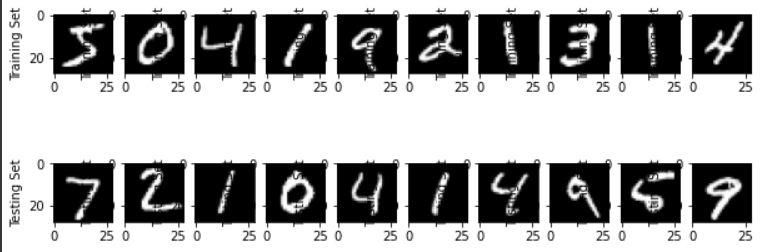

In [ ]:
# Plot some of the images in the dataset
fig0, axes = plt.subplots(2, 10)
fig0.set_figheight(4)
fig0.set_figwidth(10)

for i in range(10):
  axes[0, i].imshow(..., cmap=plt.get_cmap('gray'))
  axes[0, i].set(ylabel="Training Set")
  axes[1, i].imshow(..., cmap=plt.get_cmap('gray'))
  axes[1, i].set(ylabel="Testing Set")
plt.show()

# Preprocessing:
In this stage you will either decide to: 
1.   Use the images as they are in your dataset
2.   Perform some preprocessing. This includes scaling the images to the same norm, data augmentation, etc.

Usually, preprocessing is done to help the model generalize better. For this dataset, we need to:

1. Convert the integer pixel values to floats
2. Then divide them all by 255.0 to scale them into the 0-1 range. 
3. Then, we need to change the labels to one hot encoding vectors. 

What are one hot encoding vectors? They're super easy to understand. Suppose we have 5 labels as below (not necessarily numbers, but words, sentences, anything really):

```a, b, c, d, e```

our one hot encoding for them, assuming that b is our correct label, will take the form below:

```[0, 1, 0, 0, 0]``` 

showing a 1 for the correct label and 0 for all incorrect labels.

Our target label can be any one of these. But in classification, the final layer of prediction gives the highest probability to one of these labels as below:

```[0.001 0.02 0.18 0.1 0.75]```

Then, we just find the location of the max of all the probabilities given to get our label. In the case above, it will be the final index, ```4 = 0.75```

We then compare this index to where the 1 is in our our one hot encoding. If the indices match, then we have predicted correctly.  


Now, in the cell below, type in code to
1. Convert the trainX and testX to float type
2. Divide trainX and testX by 255.0
3. Convert trainY and testY to one hot encoding using the ```to_categorical(<set>)``` function

In [ ]:
# Preprocessing
# YOUR CODE HERE
# Step 1

# Step 2

# Step 3

# The Model:

Now that we have preprocessed the data, we need to design our model! Let's build a simple fully connected neural network.

In [ ]:
# Our model
model = tf.keras.models.Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax')
])

# Model Summary:

So below, you can run the cell to see the model summary. You will see what the image dimensions become after each layer, and the number of trainable parameters there are at each layer. 

In [ ]:
print(model.summary())

# Testing it all out

Ok, finally! We are at training. This step consists of these steps:

1. Set an optimizer
2. Set a loss
3. Compile our model with optimizer and loss
4. Set an early stopper
5. Fit the model (training)
6. Evaluate how well the training is

**Optimizer**:

At each training iteration, the model uses a special algorithm called Back Propogation Algorithm (BPA) to calculate new weights for its network, thereby making the linear algebra go to max accuracy in prediction. The optimizer calculates and sets these weights! 

**Loss**:

At each training iteration, we compute how erreneous the model is. The loss functions adds all this up and gives us a number. 

**Compile**: 

We need to compile our model. Give it a loss function and optimizer, and a metric of accuracy. 

**Early Stopper**:

So sometimes our training can be really bad or can go wrong. Totally normal. We use a callback to return to the previous best iteration or stop it entirely. 

**Fit**:

Fit to the training set and labels for so many iterations. 

**Evaluate**: 

See how well it performed on the testing data set. 

In the cell below, you can set an optimizer and early stop patience level yourself! The rest are meant for this specific task, so don't change those!

Opt: Choose from and fill the OPTIMIZER field in the code:

```Adam```
```Adagrad```
```Adadelta```
```SGD```
```RMSProp```

Early Stopper: ```patience=<integer value>```

In [ ]:
opt = tf.keras.optimizers.OPTIMIZER
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])
early_stop = EarlyStopping(monitor='categorical_accuracy', patience=..., restore_best_weights=True)

Fill in the fit function below as follows:

```model.fit(<train images>, <train labels>, epochs=<training iterations>, callbacks=early_stop)```

In [ ]:
# YOUR CODE HERE
model.fit(...)

Below, find the prediction loss and accuracy for the model. Set ```test_eval``` to the function below:

```model.evaluate(<test images>, <test labels>)```

Remember the test images and labels are ```testX, testY``` respectively. 

Then use ```test_eval``` to return 2 values. A loss and accuracy in a 1D array, indexed 0 and 1 respectively. Get those values and print them out here. Make sure to multiply any percentages by 100. 

Optionally, you can round them to 2 d.p

In [ ]:
test_eval = model.evaluate(...)
print('Loss: {}'.format(...))
print('Accuracy: {}'.format(...))

So we now have our test accuracy. This is how well the model can recognize and classify our images into the 0-9 categories. 

Let's test out how well it predicts in real time using our own inputs. I have copied over some code from another colab on image capture using the webcam and printing the photo out. 

https://colab.research.google.com/github/jfogarty/machine-learning-intro-workshop/blob/master/colab/examples/Colab_Image_Handling.ipynb#scrollTo=buJCl90WhNfq

# Real Time Image Classification

Run the cell below once. It will configure the webcam and other things. 

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Then run the cell below as many times as you want to capture images. This will show you the camera and have a 'capture' button on the top left corner. Press that when the image is in frame to capture your image and save it to photo.jpg

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Now run the cell below to convert the image to a 28x28 image suitable for our classification model. It will print out the image dimensions and the image itself resized and scaled

In [ ]:
cv2.__version__

In [ ]:
img_ = cv2.imread('photo.jpg', cv2.IMREAD_ANYCOLOR)
gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)

img_ = cv2.resize(gray,(28,28))
img_resized = cv2.imwrite(filename='photo-final.jpg', img=img_)

arr = np.array(plt.imread("photo-final.jpg")).astype(float)
maxpix = np.max(arr)
minpix = np.min(arr)
thresh = (maxpix - minpix) / 2

for row in range(arr.shape[0]):
  for col in range(arr.shape[1]):
    if arr[row, col] > thresh:
      arr[row, col] = 0
    else:
      arr[row, col] = 255

arr = arr / 255.0

print("Image dimensions: {}".format(arr.shape))

plt.imshow(arr, cmap='gray')

So we now have our image. Time to pass it into our classification model and see what it gives out! Use the ```model.predict()``` function to predict what the image label is below, and print it. Set pred equal to this.

Remember to reshape the image arr to (1, 28, 28) or else the dimensions will not agree!!

In [ ]:
pred = model.predict(...)
print("Predicted label: {}".format(...))

So there we go. We have now trained a model to recognize human written numbers! Feel free to play around with it and see how well it predicts your handwriting. 

Congratulations! You are all Machine Learning programmers now! 

# Useful Resources

UMass ACM Machine Learning Club Discord: https://discord.gg/r7EQJuFEtp

Machine Learning in general: https://www.geeksforgeeks.org/machine-learning/

Convolutional Neural Networks (advanced): https://www.geeksforgeeks.org/introduction-convolution-neural-network/